In [31]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [32]:
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
ggris = cv2.GaussianBlur(gris, (3, 3), 0)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)
sobel8 = cv2.convertScaleAbs(sobel)

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

maxfil:
220.0
Nº de filas con un número de píxeles blancos mayor o igual que 0.95*maxfil
2
Posiciones:
[12, 100]


(0.0, 512.0)

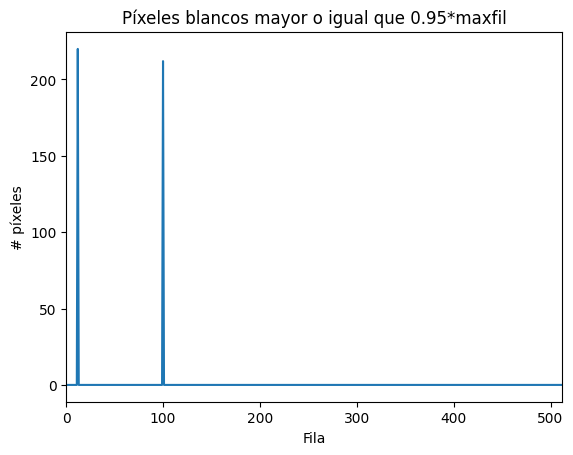

In [37]:
h, w = canny.shape

canny_fil_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

canny_fils = canny_fil_counts[:,0] / 255

canny_maxfil = np.max(canny_fils)
canny_maxfil_0_dot_95 = canny_maxfil*0.95

canny_fils_filtered = [k for k, a in enumerate(canny_fils) if a >= canny_maxfil_0_dot_95]
print("maxfil:")
print(canny_maxfil)

print("Nº de filas con un número de píxeles blancos mayor o igual que 0.95*maxfil")
print(len(canny_fils_filtered))

print("Posiciones:")
print(canny_fils_filtered)

mod_canny_fils = [a if a >= canny_maxfil_0_dot_95 else 0 for a in canny_fils]

plt.figure()
plt.title("Píxeles blancos mayor o igual que 0.95*maxfil")
plt.xlabel("Fila")
plt.ylabel("# píxeles")
plt.plot(mod_canny_fils)
plt.xlim([0, h])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

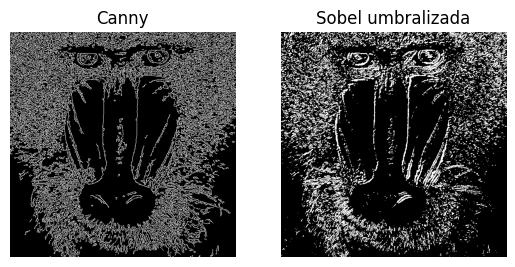

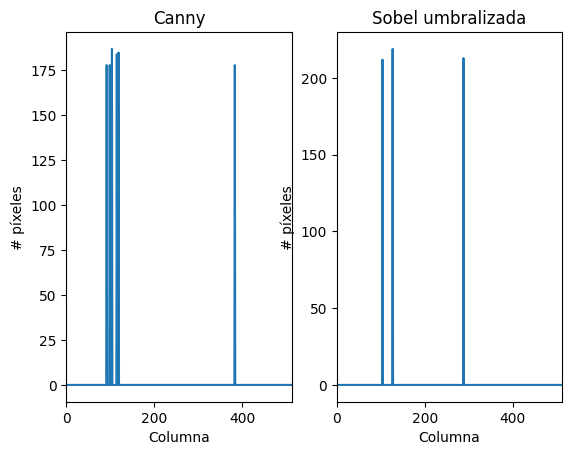

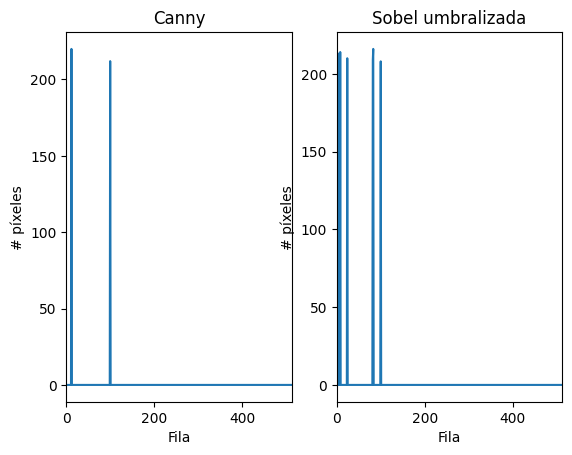

In [38]:
valorUmbral = 100
_, sobel8U = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title('Canny')
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Sobel umbralizada')
plt.imshow(sobel8U, cmap='gray')

canny_col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

canny_cols = canny_col_counts[0] / 255

canny_maxcol = np.max(canny_cols)
canny_maxcol_0_dot_95 = canny_maxcol*0.95

mod_canny_cols = [a if a >= canny_maxcol_0_dot_95 else 0 for a in canny_cols]

s8_col_counts = cv2.reduce(sobel8U, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

s8_cols = s8_col_counts[0] / 255

s8_maxcol = np.max(s8_cols)
s8_maxcol_0_dot_95 = s8_maxcol*0.95

mod_s8_cols = [a if a >= s8_maxcol_0_dot_95 else 0 for a in s8_cols]

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Canny")
plt.xlabel("Columna")
plt.ylabel("# píxeles")
plt.plot(mod_canny_cols)
plt.xlim([0, w])

plt.subplot(1, 2, 2)
plt.title("Sobel umbralizada")
plt.xlabel("Columna")
plt.ylabel("# píxeles")
plt.plot(mod_s8_cols)
plt.xlim([0, w])

s8_fil_counts = cv2.reduce(sobel8U, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

s8_fils = s8_fil_counts[:,0] / 255

s8_maxfil = np.max(s8_fils)
s8_maxfil_0_dot_95 = s8_maxfil*0.95

mod_8_fils = [a if a >= s8_maxfil_0_dot_95 else 0 for a in s8_fils]

plt.figure()
plt.subplot(1, 2, 1)
plt.title("Canny")
plt.xlabel("Fila")
plt.ylabel("# píxeles")
plt.plot(mod_canny_fils)
plt.xlim([0, h])

plt.subplot(1, 2, 2)
plt.title("Sobel umbralizada")
plt.xlabel("Fila")
plt.ylabel("# píxeles")
plt.plot(mod_8_fils)
plt.xlim([0, h])

En el resultado obtenido se observa que el conteo en las filas produce resultados similares en cuanto la posición y nº de píxeles, habiendo más files en Sobel umbralizada que superan 95% maxfil.
En el conteo en las columnas se observa un mayor nº de columnas que superan 95% maxcol en cannny y nº de píxeles ligeramente mayor en cada columna en Sobel umbralizada.

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [39]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX

def mostrarTexto(frame,texto,punto,fuente=cv2.FONT_HERSHEY_SIMPLEX,escalaFuente=0.5,color=(255,255,255),grosor=1):
    cv2.putText(frame, texto,punto,fuente,escalaFuente,color,grosor)


lanzado = 0 #bandera para primer fotograma

modo = 0
submodo = [0,0,0]

def mouse_events(event, x, y, flags, params):
    global px, py, lmb_mantenido
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        px = x
        py = y
        if modo==1 and lmb_mantenido:
            pintar_lienzo()
    elif event==cv2.EVENT_LBUTTONDOWN:
        lmb_mantenido = True
        if modo==1:
            pintar_lienzo()
    elif event==cv2.EVENT_LBUTTONUP:
        lmb_mantenido = False

def actualizarAlturaRectangulo(value):
    global alturaRectangulo
    alturaRectangulo = max(1,value)

def actualizarAnchoRectangulo(value):
    global anchoRectangulo
    anchoRectangulo = max(1,value)

def actualizarRadioCirculo(value):
    global radioCirculo
    radioCirculo = max(1,value)

def actualizarAzul(value):
    global colorForma
    lista = list(colorForma)
    lista[0] = value
    colorForma = tuple(lista)

def actualizarVerde(value):
    global colorForma
    lista = list(colorForma)
    lista[1] = value
    colorForma = tuple(lista)

def actualizarRojo(value):
    global colorForma
    lista = list(colorForma)
    lista[2] = value
    colorForma = tuple(lista)

def actualizarValorUmbral(value):
    global valorUmbral
    valorUmbral = value

def init_submodo_1_0():
    cv2.createTrackbar('Altura','Cam',alturaRectangulo,300, actualizarAlturaRectangulo)
    cv2.createTrackbar('Ancho','Cam',alturaRectangulo,300, actualizarAnchoRectangulo)

def init_submodo_1_1():
    cv2.createTrackbar('Radio','Cam',radioCirculo,150, actualizarRadioCirculo)

def init_submodo_2_2():
    cv2.createTrackbar('Umbral','Cam',valorUmbral,255, actualizarValorUmbral)

def init_modo_1():
    global lienzo
    if lienzo is None: 
        lienzo = np.zeros((frame.shape[0],frame.shape[1],4), dtype=np.uint8)
    cv2.createTrackbar('R','Cam',colorForma[2],255, actualizarRojo)
    cv2.createTrackbar('G','Cam',colorForma[1],255, actualizarVerde)
    cv2.createTrackbar('B','Cam',colorForma[0],255, actualizarAzul)
    if submodo[1] == 0:
        init_submodo_1_0()
    elif submodo[1] == 1:
        init_submodo_1_1()
def init_modo_2():
    if submodo[2] == 2:
        init_submodo_2_2()

def pintar_rectangulo(destino):
    ox = int(anchoRectangulo / 2)
    oy = int(alturaRectangulo / 2)
    x0 = px - ox
    y0 = py - oy
    x1 = px + ox
    y1 = py + oy
    cv2.rectangle(destino,(x0,y0),(x1,y1),colorForma,-1)

def pintar_circulo(destino):
    ox = px
    oy = py
    cv2.circle(destino,(ox,oy),radioCirculo,colorForma,-1)

def pintar_lienzo():
    if submodo[1] == 0:
        submodo_1_0(lienzo)
    elif submodo[1] == 1:
        submodo_1_1(lienzo)
    
def submodo_1_0(destino):
    pintar_rectangulo(destino)
    
def submodo_1_1(destino):
    pintar_circulo(destino)

def pintar_sobre_frame(frame,lienzo):
    colores_lienzo = lienzo[:,:,:3]
    _, mascara = cv2.threshold(lienzo[:,:,3], 0, 255, cv2.THRESH_BINARY_INV)
    composicion = cv2.bitwise_and(frame, frame, mask=mascara)
    composicion = cv2.bitwise_or(composicion,colores_lienzo)
    frame[:,:] = composicion[:,:]
    

def modo_1(frame):
    pintar_sobre_frame(frame,lienzo)
    if submodo[1] == 0:
        submodo_1_0(frame)
    elif submodo[1] == 1:
        submodo_1_1(frame)

def modo_1_txt(frame):
    mostrarTexto(frame,'(R) Rectangulo',(200,h-80),font)
    mostrarTexto(frame,'(C) Circulo',(200,h-50),font)
    mostrarTexto(frame,'(L) Limpiar',(200,h-20),font)

def submodo_2_0(frame):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gris, 100, 200)
    canny_3 = cv2.merge([canny,canny,canny])
    frame[:,:,0] = canny_3[:,:,0]
    frame[:,:,1] = canny_3[:,:,1]
    frame[:,:,2] = canny_3[:,:,2]

def submodo_2_1(frame):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ggris = cv2.GaussianBlur(gris, (3, 3), 0)
    sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
    sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
    sobel = cv2.add(sobelx, sobely)
    sobel8 = cv2.convertScaleAbs(sobel)
    sobel8_3 = cv2.merge([sobel8,sobel8,sobel8])
    frame[:,:,0] = sobel8_3[:,:,0]
    frame[:,:,1] = sobel8_3[:,:,1]
    frame[:,:,2] = sobel8_3[:,:,2]

def submodo_2_2(frame):
    gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, imagenUmbralizada = cv2.threshold(gris, valorUmbral, 255, cv2.THRESH_BINARY)
    imagenUmbralizada_3 = cv2.merge([imagenUmbralizada,imagenUmbralizada,imagenUmbralizada])
    frame[:,:,0] = imagenUmbralizada_3[:,:,0]
    frame[:,:,1] = imagenUmbralizada_3[:,:,1]
    frame[:,:,2] = imagenUmbralizada_3[:,:,2]
    

def modo_2(frame):
    if submodo[2] == 0:
        submodo_2_0(frame)
    if submodo[2] == 1:
        submodo_2_1(frame)
    if submodo[2] == 2:
        submodo_2_2(frame)

def modo_2_txt(frame):
    mostrarTexto(frame,'(C) Canny',(200,h-80),font)
    mostrarTexto(frame,'(S) Sobel',(200,h-50),font)
    mostrarTexto(frame,'(U) Umbral',(200,h-20),font)

alturaRectangulo = 100
anchoRectangulo = 100
dimRectangulo = [50,50]
radioCirculo = 25
colorForma = (255,0,0,255)
valorUmbral = 130
lienzo = None
px = -1
py = -1
lmb_mantenido = False
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            cv2.destroyAllWindows()
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            if modo == 1:
                init_modo_1()
            if modo == 2:
                init_modo_2()
            lanzado = 1
            
        h, w, c = frame.shape
        if (modo == 1):
            modo_1(frame)
        elif (modo == 2):
            modo_2(frame)

        cv2.rectangle(frame,(0,h-100),(w,h),(0,0,0),-1)
        mostrarTexto(frame, '(0) Camara',(10,h-80))
        mostrarTexto(frame, '(1) Dibujo',(10,h-50))
        mostrarTexto(frame, '(2) Filtros',(10,h-20))
        if (modo == 1):
            modo_1_txt(frame)
        elif (modo == 2):
            modo_2_txt(frame)

        cv2.imshow('Cam', frame)
        
    
    key = cv2.waitKey(20)

    if key == ord('0'):
        modo = 0
        lanzado = 0
    elif key == ord('1'):
        modo = 1
        lanzado = 0
    elif key == ord('2'):
        modo = 2
        lanzado = 0
    # Detenemos pulsado ESC
    elif key == 27:
        break
    elif modo == 1:
        if key == ord('r'):
            submodo[1] = 0
            lanzado = 0
        elif key == ord('c'):
            submodo[1] = 1
            lanzado = 0
        elif key == ord('l'):
            lienzo = np.zeros((frame.shape[0],frame.shape[1],4), dtype=np.uint8)
    elif modo == 2:
        if key == ord('c'):
            submodo[2] = 0
            lanzado = 0
        if key == ord('s'):
            submodo[2] = 1
            lanzado = 0
        if key == ord('u'):
            submodo[2] = 2
            lanzado = 0
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [41]:
vid = cv2.VideoCapture(0)

def actualizarBajoH(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[0] = value
    umbral_bajo = tuple(lista)

def actualizarBajoV(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[1] = value
    umbral_bajo = tuple(lista)

def actualizarBajoS(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[2] = value
    umbral_bajo = tuple(lista)

def actualizarAltoH(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[0] = value
    umbral_alto = tuple(lista)

def actualizarAltoV(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[1] = value
    umbral_alto = tuple(lista)

def actualizarAltoS(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[2] = value
    umbral_alto = tuple(lista)

umbral_bajo = (150,50,65)
umbral_alto = (180,255,255)
nueva_matiz = 0
  
lanzado = 0

  

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if lanzado == 0:
            cv2.imshow('Cam', frame)
            cv2.createTrackbar('Bajo H','Cam',umbral_bajo[0],180, actualizarBajoH)
            cv2.createTrackbar('Bajo V','Cam',umbral_bajo[1],255, actualizarBajoV)
            cv2.createTrackbar('Bajo S','Cam',umbral_bajo[2],255, actualizarBajoS)

            cv2.createTrackbar('Alto H','Cam',umbral_alto[0],180, actualizarAltoH)
            cv2.createTrackbar('Alto V','Cam',umbral_alto[1],255, actualizarAltoV)
            cv2.createTrackbar('Alto S','Cam',umbral_alto[2],255, actualizarAltoS)
            lanzado = 1
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mascara = cv2.inRange(frame_hsv, umbral_bajo, umbral_alto)
    mascara_inv = 255 - mascara
    frame_inv = 255 - frame
    res = cv2.bitwise_and(frame_inv, frame_inv, mask=mascara)
    res_inv = cv2.bitwise_and(frame, frame, mask=mascara_inv)
    fframe = cv2.bitwise_or(res,res_inv)
    cv2.imshow('Cam',fframe)
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

In [44]:
vid = cv2.VideoCapture(0)

def actualizarBajoH(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[0] = value
    umbral_bajo = tuple(lista)

def actualizarBajoV(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[1] = value
    umbral_bajo = tuple(lista)

def actualizarBajoS(value):
    global umbral_bajo
    lista = list(umbral_bajo)
    lista[2] = value
    umbral_bajo = tuple(lista)

def actualizarAltoH(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[0] = value
    umbral_alto = tuple(lista)

def actualizarAltoV(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[1] = value
    umbral_alto = tuple(lista)

def actualizarAltoS(value):
    global umbral_alto
    lista = list(umbral_alto)
    lista[2] = value
    umbral_alto = tuple(lista)

def actualizarNuevaMatiz(value):
    global nueva_matiz
    nueva_matiz = value

umbral_bajo = (150,50,65)
umbral_alto = (180,255,255)
nueva_matiz = 0
  
lanzado = 0

  

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        if lanzado == 0:
            cv2.imshow('Cam', frame)
            cv2.createTrackbar('Bajo H','Cam',umbral_bajo[0],180, actualizarBajoH)
            cv2.createTrackbar('Bajo V','Cam',umbral_bajo[1],255, actualizarBajoV)
            cv2.createTrackbar('Bajo S','Cam',umbral_bajo[2],255, actualizarBajoS)

            cv2.createTrackbar('Alto H','Cam',umbral_alto[0],180, actualizarAltoH)
            cv2.createTrackbar('Alto V','Cam',umbral_alto[1],255, actualizarAltoV)
            cv2.createTrackbar('Alto S','Cam',umbral_alto[2],255, actualizarAltoS)
            cv2.createTrackbar('Matiz','Cam',nueva_matiz,255, actualizarNuevaMatiz)
            lanzado = 1
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mascara = cv2.inRange(frame_hsv, umbral_bajo, umbral_alto)
    mascara_inv = 255 - mascara
    frame_hsv[:,:,0] = nueva_matiz
    frame_mod = cv2.cvtColor(frame_hsv, cv2.COLOR_HSV2BGR)
    res = cv2.bitwise_and(frame_mod, frame_mod, mask=mascara)
    res_inv = cv2.bitwise_and(frame, frame, mask=mascara_inv)
    fframe = cv2.bitwise_or(res,res_inv)
    cv2.imshow('Cam',fframe)
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()